# Models Evaluation

In this notebook we will choose the best model. 

In [1]:
import os
import pandas as pd
import shutil
import warnings

from CogniPredictAD.classification import ADNIEvaluator

pd.set_option('display.max_rows', 116)
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_info_columns', 40) 

warnings.filterwarnings("ignore", message="X has feature names")

pretrain = pd.read_csv("../data/pretrain.csv")
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

# Target column
y_train = train['DX']
y_learn = pretrain['DX'] # The same of y_train
y_test = test['DX']

# All other columns as features
X_train = train.drop(columns=['DX'])
X_learn = pretrain.drop(columns=['DX'])
X_test = test.drop(columns=['DX'])

# Directories with saved .pkl models
model_dirs = ["../results/all_models"]

# Preload models at construction time (recommended)
evaluation = ADNIEvaluator(model_dirs=model_dirs, sampling_title=True)

Loaded model 'Adaptive_Boosting' from ../results/all_models\Adaptive_Boosting.pkl
Loaded model 'Adaptive_Boosting_Sampled' from ../results/all_models\Adaptive_Boosting_Sampled.pkl
Loaded model 'Decision_Tree' from ../results/all_models\Decision_Tree.pkl
Loaded model 'Decision_Tree_Sampled' from ../results/all_models\Decision_Tree_Sampled.pkl
Loaded model 'Extra_Trees' from ../results/all_models\Extra_Trees.pkl
Loaded model 'Extra_Trees_Sampled' from ../results/all_models\Extra_Trees_Sampled.pkl
Loaded model 'Multinomial_Logistic_Regression' from ../results/all_models\Multinomial_Logistic_Regression.pkl
Loaded model 'Multinomial_Logistic_Regression_Sampled' from ../results/all_models\Multinomial_Logistic_Regression_Sampled.pkl
Loaded model 'Random_Forest' from ../results/all_models\Random_Forest.pkl
Loaded model 'Random_Forest_Sampled' from ../results/all_models\Random_Forest_Sampled.pkl


**Let's see which of these models performs best on the test set and which one will therefore be chosen.**

Evaluating: Adaptive_Boosting
Evaluating: Adaptive_Boosting_Sampled
Evaluating: Decision_Tree
Evaluating: Decision_Tree_Sampled
Evaluating: Extra_Trees
Evaluating: Extra_Trees_Sampled
Evaluating: Multinomial_Logistic_Regression
Evaluating: Multinomial_Logistic_Regression_Sampled
Evaluating: Random_Forest
Evaluating: Random_Forest_Sampled

F1 Score (macro) per model and split:


Split,Train,CrossVal,Test
Model,,,
Adaptive_Boosting,0.941976,0.911786,0.928534
Adaptive_Boosting_Sampled,0.942536,0.911786,0.926243
Decision_Tree,0.907780,0.898010,0.893433
Decision_Tree_Sampled,0.912597,0.895758,0.913146
Extra_Trees,0.983624,0.908775,0.937599
Extra_Trees_Sampled,0.943496,0.904751,0.935871
Multinomial_Logistic_Regression,0.881736,0.866272,0.869975
Multinomial_Logistic_Regression_Sampled,0.888650,0.868683,0.867728
Random_Forest,0.935490,0.910172,0.930107


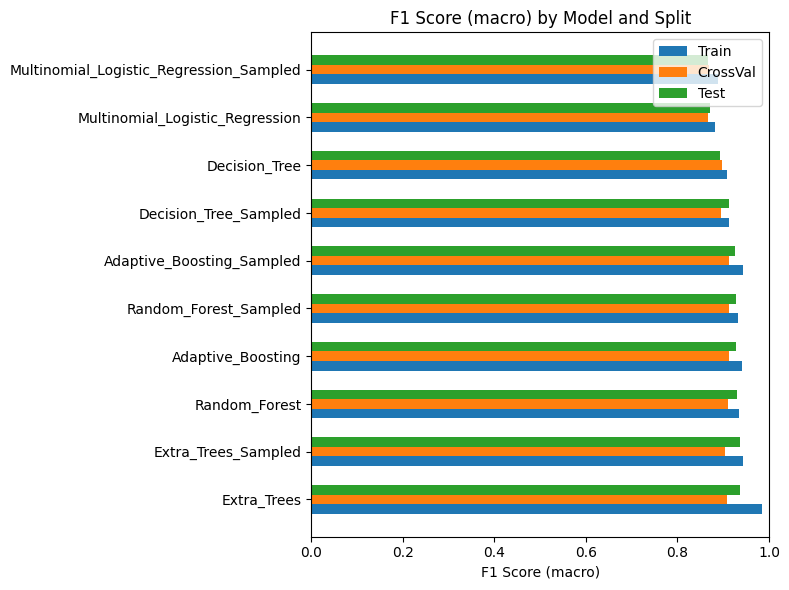


Confusion matrices (raw counts) - TEST SET:


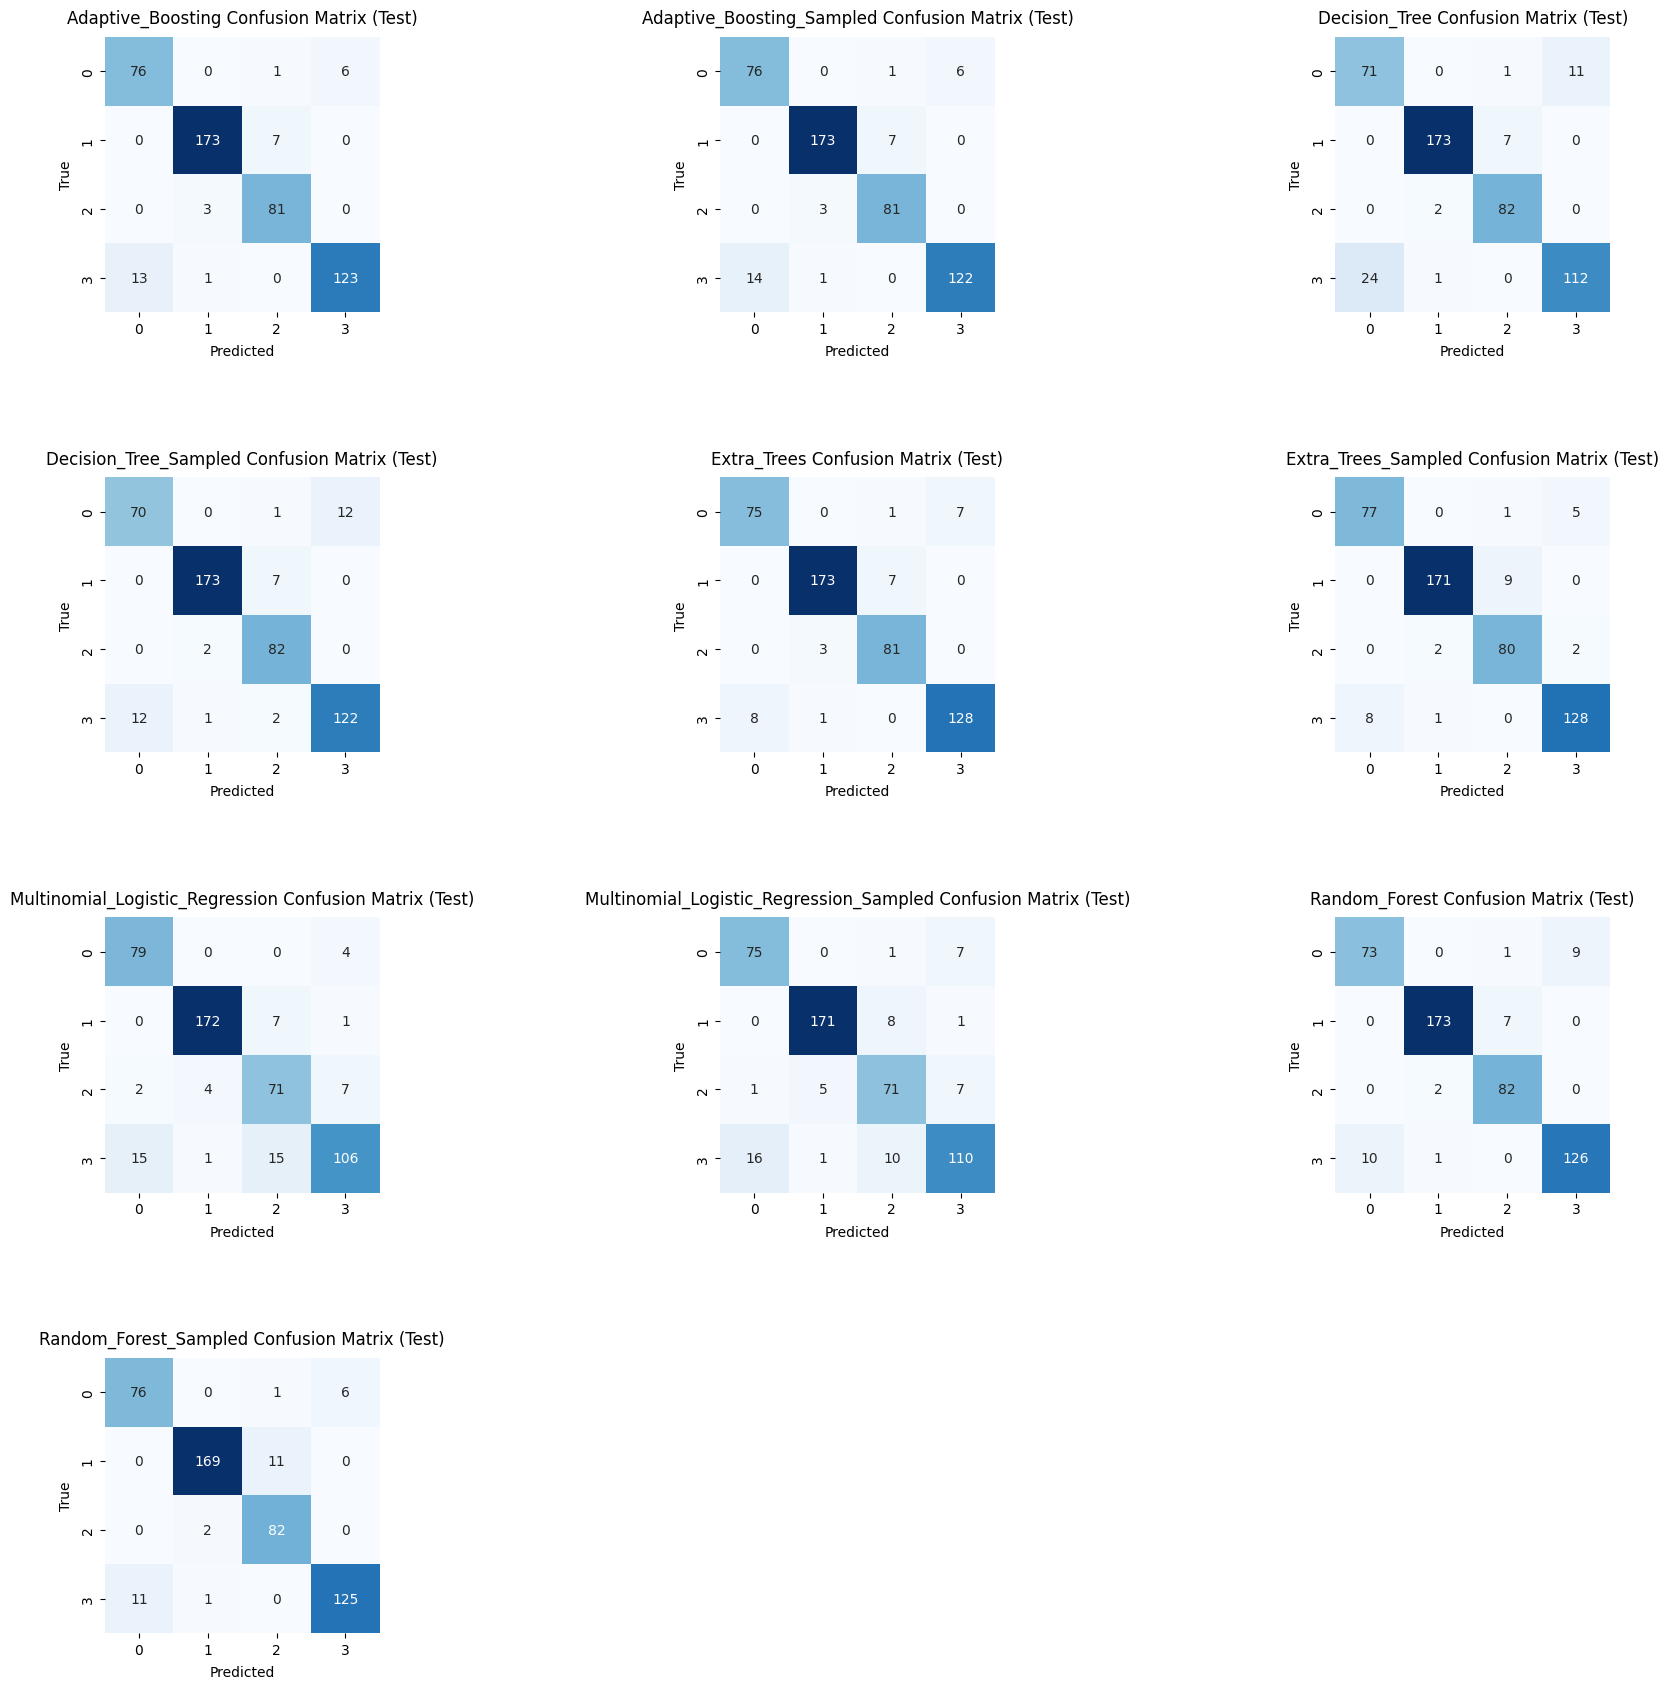


Confusion matrices (normalized by true-row) - TEST SET:


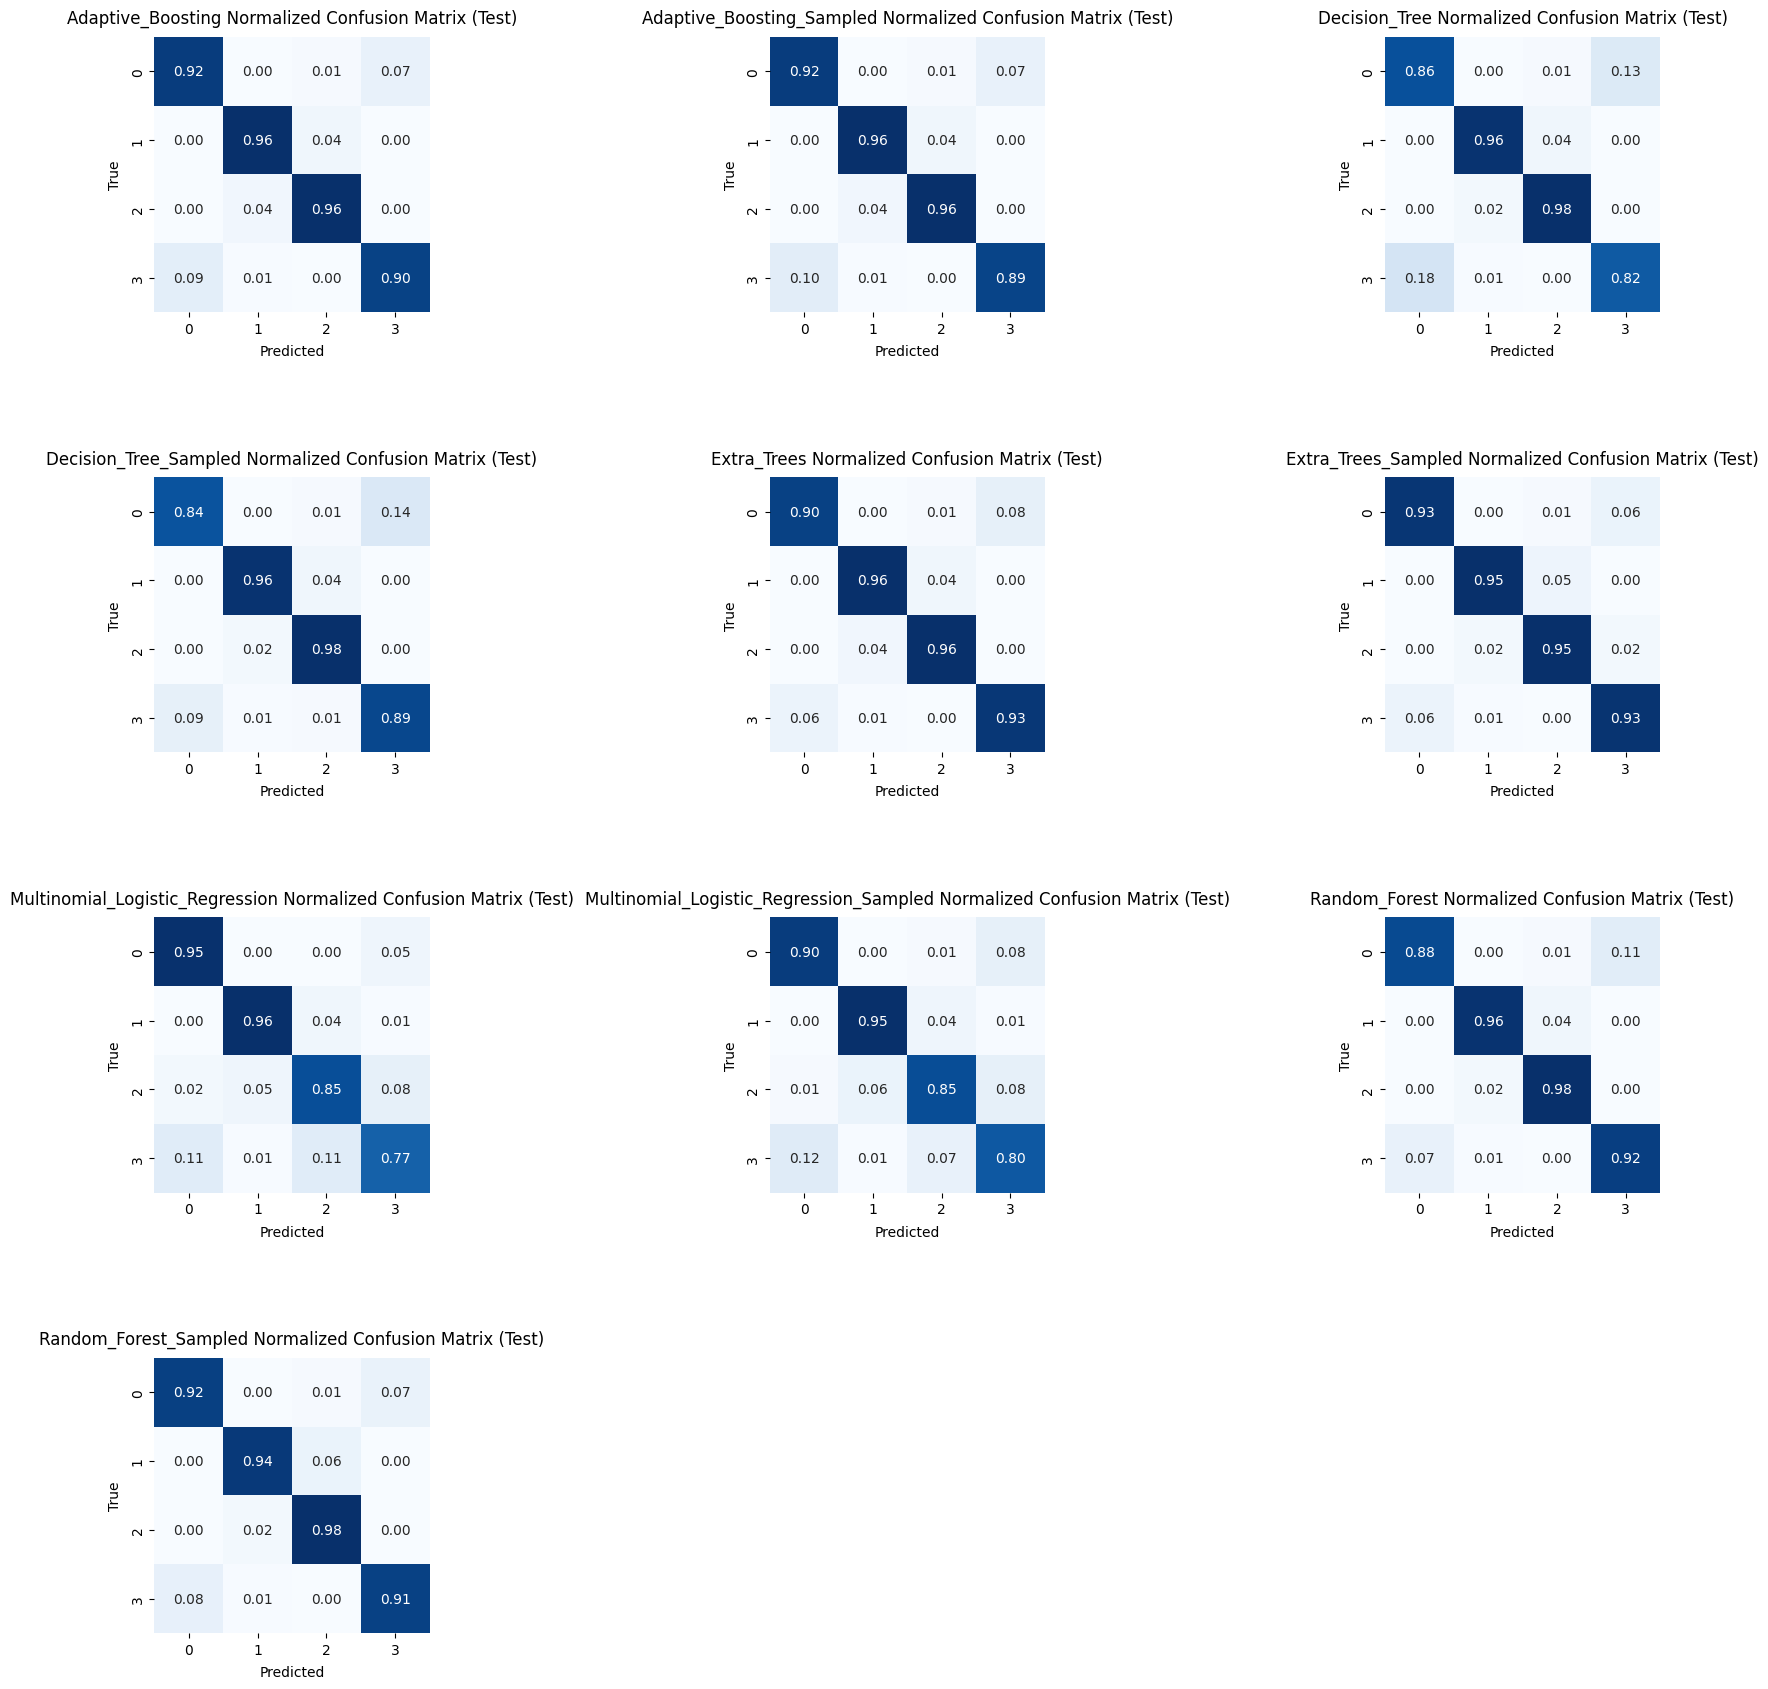

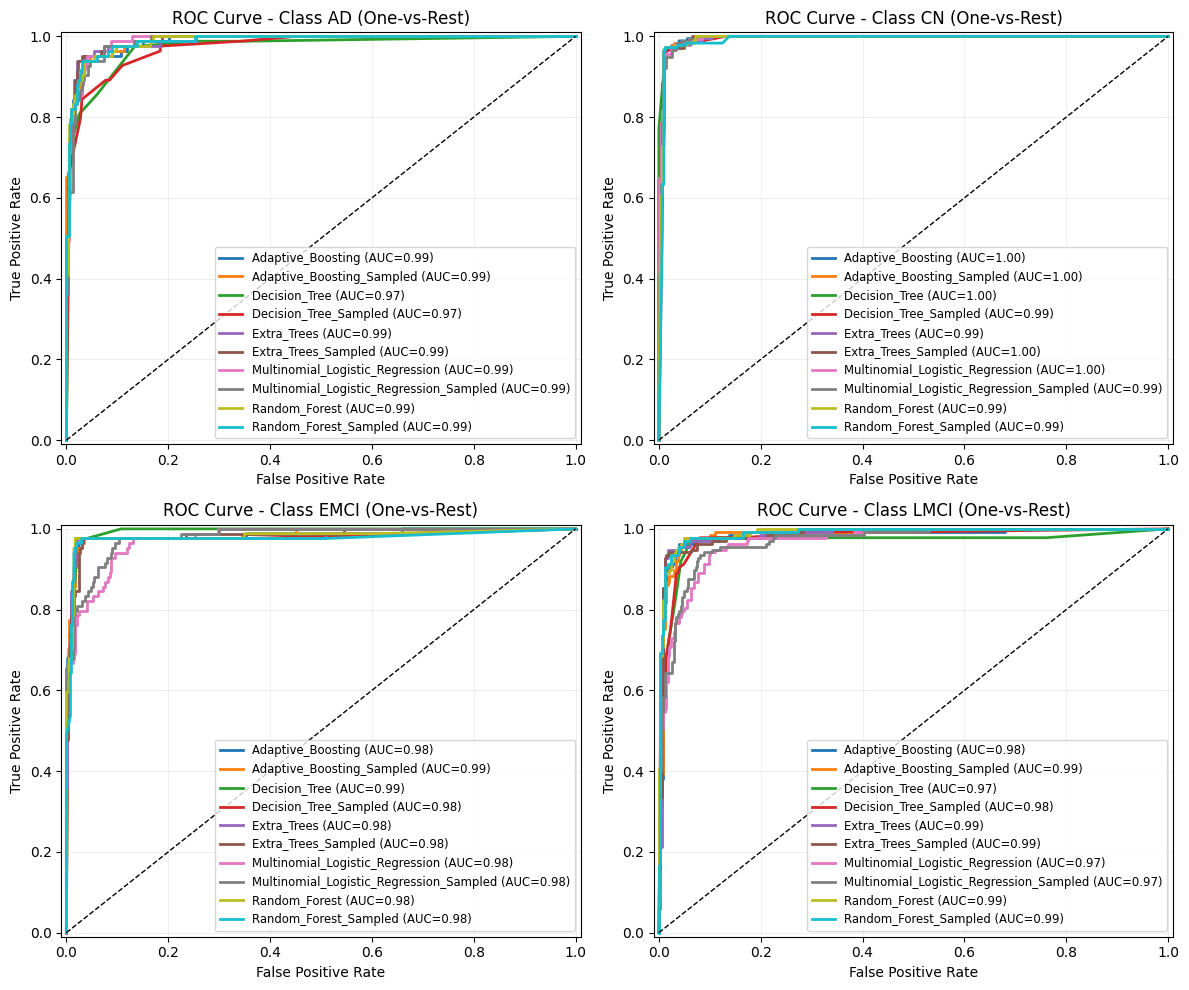


Overall comparison on TEST SET (sorted by F1 Score (macro)):


,F1 Score (macro),Accuracy,Balanced Accuracy,Precision (weighted),Recall (weighted),F1 Score (weighted),ROC AUC (macro)
Model,,,,,,,
Extra_Trees,0.937599,0.944215,0.940829,0.944789,0.944215,0.944326,0.986739
Extra_Trees_Sampled,0.935871,0.942149,0.941100,0.943487,0.942149,0.942488,0.989027
Random_Forest,0.930107,0.938017,0.934132,0.938702,0.938017,0.938105,0.988604
Adaptive_Boosting,0.928534,0.935950,0.934717,0.937781,0.935950,0.936283,0.987829
Random_Forest_Sampled,0.927132,0.933884,0.935788,0.936711,0.933884,0.934389,0.986310
Adaptive_Boosting_Sampled,0.926243,0.933884,0.932893,0.936051,0.933884,0.934258,0.988967
Decision_Tree_Sampled,0.913146,0.923554,0.917797,0.924352,0.923554,0.923536,0.980435
Decision_Tree,0.893433,0.904959,0.902560,0.909596,0.904959,0.905703,0.982370
Multinomial_Logistic_Regression,0.869975,0.884298,0.881581,0.889285,0.884298,0.884289,0.982479


In [2]:
# Run evaluation
out = evaluation.evaluate_models(
    X_learn=X_learn, y_learn=y_learn,
    X_train=X_train, y_train=y_train,
    X_test=X_test, y_test=y_test,
    cv_splits=5,
    cv_repeats=3,
    display_individual_tables=False,
    plot_roc=True,           # set False if you don't want ROC plots
    save_results_dir=None    # set a path to save test_comparison.csv if you want
)

# "out" is the dictionary returned by evaluate_models
# You can for example inspect the test comparison table
test_comparison_df = out["test_comparison"]

The model ***Extra Trees***, trained **without Hybrid Sampling** (***Extra_Trees***), demonstrates the best overall performance among the evaluated classifiers.  
It achieves a **macro F1 Score** of **0.9376** and an **Accuracy** of **0.9442**, indicating both high predictive precision and balanced performance across diagnostic classes on the **Test set**.  
Its **ROC AUC (macro)** of **0.9867** further confirms an exceptional ability to discriminate between classes while maintaining class balance.  
This model will be referred to as ***Model***.

Complementarily, a ***Decision Tree*** has been selected to ensure model interpretability and transparency, essential for explainable clinical or diagnostic applications.  
Between the two Decision Tree configurations tested, the ***Decision_Tree_Sampled*** version shows a higher **macro F1 Score** and superior **Accuracy** on the Test set compared to the unsampled **Decision_Tree**.  
This model balances interpretability with improved generalization and will be referred to as ***XAIModel***.

***In summary, we choose ExtraTrees without sampling as "Model" and Decision Tree with sampling as "XAIModel".*** 


In [3]:
dst_path = "../results"
src_path = "../results/all_models/Extra_Trees.pkl"
os.makedirs(dst_path, exist_ok=True)
dest_file = os.path.join(dst_path, "Model.pkl")
shutil.copy2(src_path, dest_file)

src_path = "../results/all_models/Decision_Tree_Sampled.pkl"
os.makedirs(dst_path, exist_ok=True)
dest_file = os.path.join(dst_path, "XAIModel.pkl")
shutil.copy2(src_path, dest_file)

src_path = "../results/all_models/trees/Decision_Tree_Sampled_tree.pdf"
os.makedirs(dst_path, exist_ok=True)
dest_file = os.path.join(dst_path, "XAIModel_tree.pdf")
shutil.copy2(src_path, dest_file)

src_path = "../results/all_models/rules/Decision_Tree_Sampled_rules.txt"
os.makedirs(dst_path, exist_ok=True)
dest_file = os.path.join(dst_path, "XAIModel_rules.txt")
shutil.copy2(src_path, dest_file)

print("Saved Models: Model, XAIModel")

Saved Models: Model, XAIModel
